<p style="background-color: purple; font-family: newtimeroman; font-size: 250%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b> Credit Score Project</b>

<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 

</p>


- **ID**: The unique identifier for each record in the dataset.
- **Customer_ID**: The unique identifier for each customer.
- **Month**: The month to which the record corresponds.
- **Name**: The name of the customer.
- **Age**: The age of the customer. Note: There are some data quality issues, such as anomalous values.
- **SSN**: The Social Security Number of the customer.
- **Occupation**: The occupation of the customer.
- **Annual_Income**: The annual income of the customer in USD.
- **Monthly_Inhand_Salary**: The monthly take-home (net) salary of the customer in USD.
- **Num_Bank_Accounts**: The number of bank accounts held by the customer.
- **Num_Credit_Card**: The number of credit cards held by the customer.
- **Interest_Rate**: The average interest rate (%) applicable to the customer's loans or credit cards.
- **Num_of_Loan**: The number of loans (including mortgages, personal loans, auto loans, etc.) that the customer has.
- **Type_of_Loan**: The types of loans taken by the customer, listed in a single cell and separated by semicolons.
- **Delay_from_due_date**: The average delay (in days) from the due date for payments across all the customer's loans and credit cards.
- **Num_of_Delayed_Payment**: The total number of times the customer has delayed payments across all loans and credit cards.
- **Changed_Credit_Limit**: Any recent changes to the customer's credit limit (requires further context).
- **Num_Credit_Inquiries**: The number of inquiries made on the customer's credit report, typically indicating applications for new credit.
- **Credit_Mix**: The diversity of credit types held by the customer, affecting credit scores. Specific categories (e.g., "Good", "Bad") need further definition.
- **Outstanding_Debt**: The total outstanding debt the customer has across all loans and credit lines.
- **Credit_Utilization_Ratio**: The ratio of total debt to total available credit, a key indicator of credit risk.
- **Credit_History_Age**: The age of the customer's credit history.
- **Payment_of_Min_Amount**: Indicates whether the customer typically pays at least the minimum amount due on their debts.
- **Total_EMI_per_month**: The total monthly payment the customer makes towards all their loans as EMI (Equated Monthly Installment).
- **Amount_invested_monthly**: The amount of money the customer invests monthly (could be in savings accounts, stocks, bonds, etc.).
- **Payment_Behaviour**: Characterizes the customer's payment behavior in terms of expenditure and value of transactions.
- **Monthly_Balance**: The average monthly balance maintained by the customer in their accounts.
- **Credit_Score**: The credit score of the customer, a summary measure of their creditworthiness.


### Installing Tensorflow

In [49]:
#pip install keras

In [50]:
#!pip install tensorflow

## Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import missingno as msno
from skimpy import clean_columns

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Read Data Sets

In [52]:
df = pd.read_csv("train.csv")
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843,NaN,NaN,NaN,1824.843
Num_Bank_Accounts,3,3,3,3,3


In [53]:
df1 = pd.read_csv("test.csv")
df1.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,NaN,3037.987
Num_Bank_Accounts,3,3,3,3,2


## EDA

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


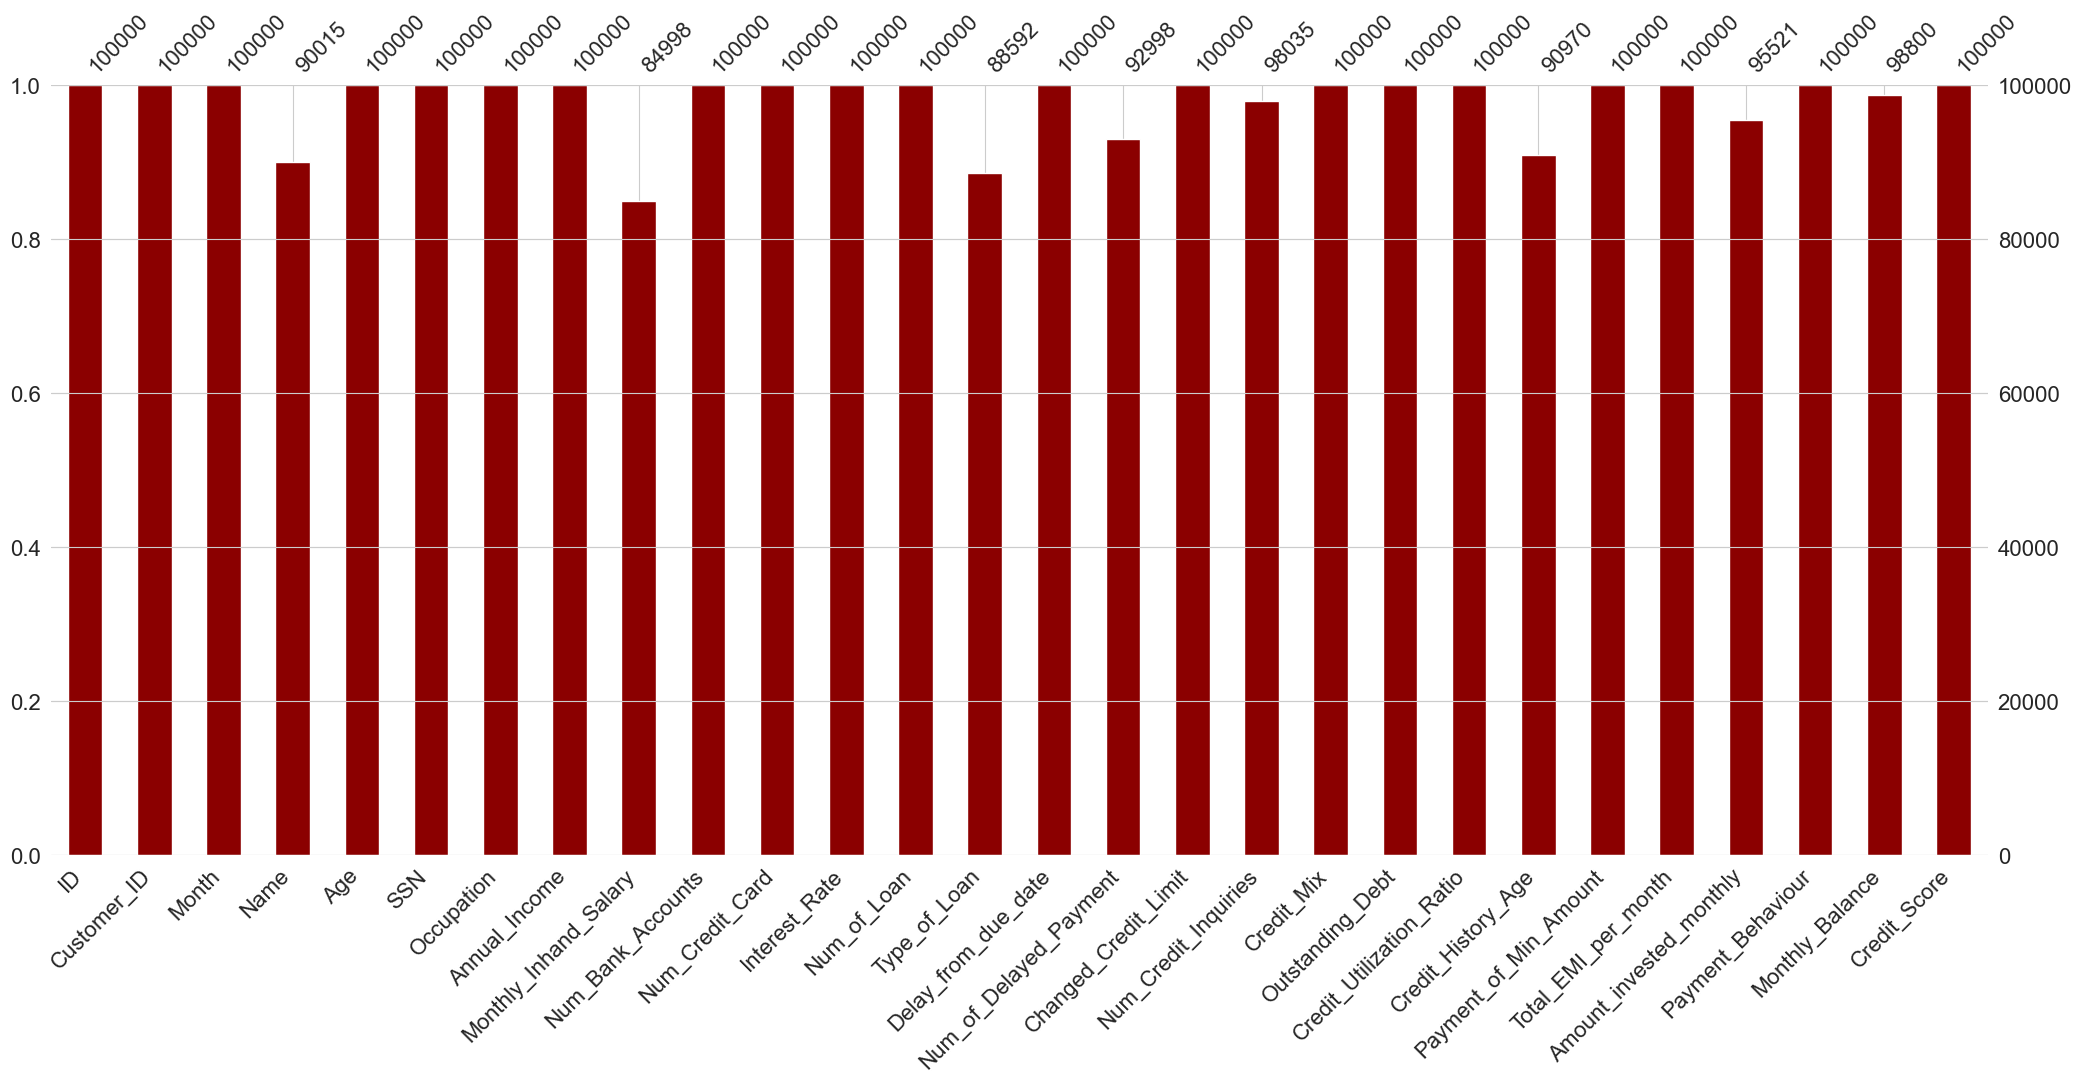

In [56]:
msno.bar(df, color= "darkred");

In [57]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
ID,0,0.000
Customer_ID,0,0.000
Month,0,0.000
Name,9985,9.980
Age,0,0.000
SSN,0,0.000
Occupation,0,0.000
Annual_Income,0,0.000
Monthly_Inhand_Salary,15002,15.000
Num_Bank_Accounts,0,0.000


In [58]:
df=clean_columns(df)
df

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


In [59]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: id
Number of Unique Values: 100000
First 10 Unique Values: ['0x1602' '0x1603' '0x1604' '0x1605' '0x1606' '0x1607' '0x1608' '0x1609'
 '0x160e' '0x160f']
... and 99990 more unique values

Column: customer_id
Number of Unique Values: 12500
First 10 Unique Values: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08']
... and 12490 more unique values

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: name
Number of Unique Values: 10140
First 10 Unique Values: ['Aaron Maashoh' nan 'Rick Rothackerj' 'Langep' 'Jasond' 'Deepaa' 'Np'
 'Nadiaq' 'Annk' 'Charlie Zhur']
... and 10130 more unique values

Column: age
Number of Unique Values: 1788
First 10 Unique Values: ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33']
... and 1778 more unique values

Column: ssn
Number of Unique Values: 12501
First 10 Unique Values: ['821-00-0265

In [60]:
#df.corr(numeric_only= True)

In [61]:
df_numeric = df.select_dtypes(include ="number")

def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color


df_numeric.corr().style.applymap(color_correlation1)

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
monthly_inhand_salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
num_bank_accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
num_credit_card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
interest_rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
num_credit_inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
credit_utilization_ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
total_emi_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


In [62]:
df = df.drop(columns=['id', 'age', 'occupation','monthly_inhand_salary','customer_id','annual_income', 'name', 'ssn', 'type_of_loan'], axis = 1)
df

,month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,3,4,3,4,3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,3,4,3,4,-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,3,4,3,4,3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,3,4,3,4,5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,3,4,3,4,6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,4,6,7,2,23,7,11.5,3.000,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,May,4,6,7,2,18,7,11.5,3.000,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,June,4,6,5729,2,27,6,11.5,3.000,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,July,4,6,7,2,20,NaN,11.5,3.000,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


In [63]:
df.sample(6).T

,6909,2968,40763,12425,85350,93543
month,June,January,April,February,July,August
num_bank_accounts,5,5,2,4,7,2
num_credit_card,3,6,1,4,6,4
interest_rate,20,18,6,792,4,12
num_of_loan,4,4,3,4,1,0
delay_from_due_date,28,18,1,29,19,-2
num_of_delayed_payment,20,11,0,16,10,10
changed_credit_limit,16.04,10.55,2.65,11.78,0.78,6.74
num_credit_inquiries,6.000,3.000,4.000,7.000,6.000,7.000
credit_mix,_,Standard,Good,Standard,Good,Good


### Monthly_inhand_salary

In [64]:
#df['monthly_inhand_salary'].fillna(df['monthly_inhand_salary'].median(), inplace=True)


### Num of Delayed Payment

In [65]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].str.replace('-', '').str.replace('_', '')
df['num_of_delayed_payment'] = pd.to_numeric(df['num_of_delayed_payment'], errors='coerce')

df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median(), inplace=True)

In [66]:
df['num_of_delayed_payment'].value_counts()

num_of_delayed_payment
14.000      11195
19.000       5481
17.000       5412
16.000       5312
10.000       5309
            ...  
848.000         1
4134.000        1
1530.000        1
1502.000        1
2047.000        1
Name: count, Length: 708, dtype: int64

### Change Credit Limit 

In [67]:
df['changed_credit_limit'] = pd.to_numeric(df['changed_credit_limit'].str.replace('_', ''), errors='coerce')

In [68]:
df['changed_credit_limit'] = df['changed_credit_limit'].median()

df['changed_credit_limit'].fillna(df['changed_credit_limit'], inplace=True)

### Delay_from_due_date

In [69]:

df['delay_from_due_date'] = df['delay_from_due_date'].astype(str).str.replace('-', '')
df['delay_from_due_date'] = pd.to_numeric(df['delay_from_due_date'], errors='coerce')


### Annual_income

In [70]:
#df['annual_income'] = pd.to_numeric(df['annual_income'].str.replace('_', ''), errors='coerce')

### Num_credit_inquiries

In [71]:

df['num_credit_inquiries'].fillna(df['num_credit_inquiries'].median(), inplace=True)

### Payment_of_min_amount

In [72]:
df['payment_of_min_amount'].replace({'NM': 'No'}, inplace=True)
df = pd.get_dummies(df, columns=['credit_mix', 'payment_of_min_amount'])

df.head()

,month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,...,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_mix_Bad,credit_mix_Good,credit_mix_Standard,credit_mix__,payment_of_min_amount_No,payment_of_min_amount_Yes
0,January,3,4,3,4,3,7.000,9.400,4.000,809.98,...,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,False,False,False,True,True,False
1,February,3,4,3,4,1,14.000,9.400,4.000,809.98,...,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,False,True,False,False,True,False
2,March,3,4,3,4,3,7.000,9.400,4.000,809.98,...,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,False,True,False,False,True,False
3,April,3,4,3,4,5,4.000,9.400,4.000,809.98,...,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,False,True,False,False,True,False
4,May,3,4,3,4,6,14.000,9.400,4.000,809.98,...,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,False,True,False,False,True,False


### Credit_history_age_months

In [73]:

def years_months_to_months(period):
    if pd.isnull(period):
        return period
    
    parts = period.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['credit_history_age_months'] = df['credit_history_age'].apply(years_months_to_months)
df[['credit_history_age', 'credit_history_age_months']].head()


,credit_history_age,credit_history_age_months
0,22 Years and 1 Months,265.000
1,NaN,NaN
2,22 Years and 3 Months,267.000
3,22 Years and 4 Months,268.000
4,22 Years and 5 Months,269.000


In [74]:

df['credit_history_age_months'].fillna(df['credit_history_age_months'].median(), inplace=True)


In [75]:
df=df.drop("credit_history_age",axis=1)


### Amount_invested_monthly	

In [76]:
df['amount_invested_monthly'] = pd.to_numeric(df['amount_invested_monthly'], errors='coerce')
median_amount_invested_monthly = df['amount_invested_monthly'].median()

df['amount_invested_monthly'].fillna(median_amount_invested_monthly, inplace=True)


### Monthly_balance

In [77]:
df['monthly_balance'] = pd.to_numeric(df['monthly_balance'], errors='coerce')
median_monthly_balance = df['monthly_balance'].median()
df['monthly_balance'].fillna(median_monthly_balance, inplace=True)


### Num of Loan 

In [78]:
df['num_of_loan'] = pd.to_numeric(df['num_of_loan'].str.replace('_', '').replace('', np.nan),
                                  errors='coerce').fillna(0).astype(int)

df.loc[df['num_of_loan'] < 0, 'num_of_loan'] = -1

### Payment Behaviour

In [79]:
df['payment_behaviour'] = df['payment_behaviour'].replace('!@9#%8', np.nan)

### Outstanding_debt

In [80]:
df['outstanding_debt'] = df['outstanding_debt'].str.replace('-', '').str.replace('_', '')
df['outstanding_debt'] = pd.to_numeric(df['outstanding_debt'], errors='coerce')

###  Check NULL Values 

In [81]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
month,0,0.000
num_bank_accounts,0,0.000
num_credit_card,0,0.000
interest_rate,0,0.000
num_of_loan,0,0.000
delay_from_due_date,0,0.000
num_of_delayed_payment,0,0.000
changed_credit_limit,0,0.000
num_credit_inquiries,0,0.000
outstanding_debt,0,0.000


In [82]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: month
Number of Unique Values: 8
Unique Values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Column: num_bank_accounts
Number of Unique Values: 943
First 10 Unique Values: [3 2 1 7 4 0 8 5 6 9]
... and 933 more unique values

Column: num_credit_card
Number of Unique Values: 1179
First 10 Unique Values: [   4 1385    5 1288    1    7    6 1029  488    8]
... and 1169 more unique values

Column: interest_rate
Number of Unique Values: 1750
First 10 Unique Values: [   3    6    8    4    5 5318   15    7   12   20]
... and 1740 more unique values

Column: num_of_loan
Number of Unique Values: 414
First 10 Unique Values: [  4   1   3 967  -1   0   2   7   5   6]
... and 404 more unique values

Column: delay_from_due_date
Number of Unique Values: 68
First 10 Unique Values: [ 3  1  5  6  8  7 13 10  0  4]
... and 58 more unique values

Column: num_of_delayed_payment
Number of Unique Values: 708
First 10 Unique Values: [ 7. 14.  4.  8.  6.  1.  3.  0.  5.  9.]
..

## Data Visualization

In [ ]:
max_unique_values = 100

for col in df.columns:
    if col in df and df[col].nunique() <= max_unique_values:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=col, data= df, palette="colorblind")
        
        plt.title(f"Count by {col}")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        
        # Adding counts above each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
        
plt.show()

In [ ]:
ax = sns.countplot(x=df["credit_score"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="b", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'credit_score')
create_pie_chart_of_count(df, 'payment_behaviour')
create_pie_chart_of_count(df, 'occupation')

In [ ]:
#sns.pairplot(data=df, hue='credit_score',corner =True)
#plt.show()

In [ ]:
sns.heatmap(data=df.corr(numeric_only= True), annot=True);


## Data Preprocessing

### Month

In [83]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
df['Month'] = df['month'].map(months)


In [84]:
df=df.drop("month", axis=1)


In [85]:
df.head().T

,0,1,2,3,4
num_bank_accounts,3,3,3,3,3
num_credit_card,4,4,4,4,4
interest_rate,3,3,3,3,3
num_of_loan,4,4,4,4,4
delay_from_due_date,3,1,3,5,6
num_of_delayed_payment,7.000,14.000,7.000,4.000,14.000
changed_credit_limit,9.400,9.400,9.400,9.400,9.400
num_credit_inquiries,4.000,4.000,4.000,4.000,4.000
outstanding_debt,809.980,809.980,809.980,809.980,809.980
credit_utilization_ratio,26.823,31.945,28.609,31.378,24.797


### Credit Score 

In [86]:
df['credit_score'].value_counts()

credit_score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [87]:
class_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}
df['credit_score'] = df['credit_score'].map(class_mapping)

### Occupation

In [88]:
#df['occupation'].replace('________', 'Unknown', inplace=True)

#less_frequent_occupations = ['Musician', 'Journalist'] 
#df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x in less_frequent_occupations else x)

#df = pd.get_dummies(df, columns=['occupation'])
#df.rename(columns={'occupation________': 'occupation_Unknown'}, inplace=True)

### Payment_behaviour

In [89]:
most_frequent = df['payment_behaviour'].mode()[0]
df['payment_behaviour'].fillna(most_frequent, inplace=True)


In [90]:
 from sklearn.preprocessing import OneHotEncoder

In [91]:
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['payment_behaviour']])

# encoded_features'ı dense matrise çevirelim ve DataFrame oluşturalım
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Orijinal DataFrame'den 'payment_behaviour' sütununu çıkarıp, encoded_df ile birleştirelim
df = pd.concat([df.drop('payment_behaviour', axis=1), encoded_df], axis=1)


In [92]:
df.head()

,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,...,payment_of_min_amount_No,payment_of_min_amount_Yes,credit_history_age_months,Month,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,3,4,3,4,3,7.000,9.400,4.000,809.980,26.823,...,True,False,265.000,1,0.000,0.000,1.000,0.000,0.000,0.000
1,3,4,3,4,1,14.000,9.400,4.000,809.980,31.945,...,True,False,219.000,2,0.000,0.000,0.000,1.000,0.000,0.000
2,3,4,3,4,3,7.000,9.400,4.000,809.980,28.609,...,True,False,267.000,3,0.000,0.000,0.000,0.000,1.000,0.000
3,3,4,3,4,5,4.000,9.400,4.000,809.980,31.378,...,True,False,268.000,4,0.000,0.000,0.000,0.000,0.000,1.000
4,3,4,3,4,6,14.000,9.400,4.000,809.980,24.797,...,True,False,269.000,5,0.000,1.000,0.000,0.000,0.000,0.000


### Changed_credit_limit

## Train - Test Split

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [94]:
X = df.drop('credit_score', axis=1)
y = df['credit_score'].values
seed = 61
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=seed)

In [95]:
scaler = MinMaxScaler()

In [96]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train.shape

(80000, 27)

## ANN Modelling & Model Performance

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [99]:
from tensorflow.keras.optimizers import Adam

In [100]:
model = Sequential([
    
    Dense(128, activation="relu"),  
    (Dropout(0.2)),
    
    Dense(128, activation="relu"),  
    (Dropout(0.2)),
    Dense(64, activation="relu"),
    (Dropout(0.2)),
  BatchNormalization(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),  
    BatchNormalization(),
    Dense(8, activation="relu"), 
    
    Dense(4, activation="relu"),
    Dense(3, activation="softmax") 
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [101]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)


In [102]:
model.fit(x=X_train,
          y=y_train,
          validation_split = 0.1,
          batch_size=64,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5564 - loss: 0.8981 - val_accuracy: 0.6432 - val_loss: 0.7380
Epoch 2/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6397 - loss: 0.7439 - val_accuracy: 0.6524 - val_loss: 0.7173
Epoch 3/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6454 - loss: 0.7258 - val_accuracy: 0.6544 - val_loss: 0.7118
Epoch 4/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6479 - loss: 0.7250 - val_accuracy: 0.6549 - val_loss: 0.7093
Epoch 5/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6536 - loss: 0.7122 - val_accuracy: 0.6538 - val_loss: 0.7054
Epoch 6/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6517 - loss: 0.7167 - val_accuracy: 0.6555 - val_loss: 0.7036
Epoch 7/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6532 - loss: 0.7126 - val_accuracy: 0.6554 - val_loss: 0.7075
Epoch 8/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6527 - loss: 

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6608 - loss: 0.6897 - val_accuracy: 0.6599 - val_loss: 0.6908
Epoch 51/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6616 - loss: 0.6874 - val_accuracy: 0.6521 - val_loss: 0.6944
Epoch 52/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6617 - loss: 0.6865 - val_accuracy: 0.6586 - val_loss: 0.6929
Epoch 53/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6615 - loss: 0.6922 - val_accuracy: 0.6565 - val_loss: 0.6965
Epoch 54/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6635 - loss: 0.6882 - val_accuracy: 0.6595 - val_loss: 0.6930
Epoch 55/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6636 - loss: 0.6867 - val_accuracy: 0.6631 - val_loss: 0.6913
Epoch 56/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6625 - loss: 0.6887 - val_accuracy: 0.6630 - val_loss: 0.6916
Epoch 57/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6635 - loss: 0.6893

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6686 - loss: 0.6751 - val_accuracy: 0.6618 - val_loss: 0.6897
Epoch 100/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6692 - loss: 0.6780 - val_accuracy: 0.6625 - val_loss: 0.6882
Epoch 101/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6658 - loss: 0.6801 - val_accuracy: 0.6633 - val_loss: 0.6889
Epoch 102/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6691 - loss: 0.6780 - val_accuracy: 0.6614 - val_loss: 0.6895
Epoch 103/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6709 - loss: 0.6774 - val_accuracy: 0.6633 - val_loss: 0.6872
Epoch 104/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6711 - loss: 0.6752 - val_accuracy: 0.6647 - val_loss: 0.6898
Epoch 105/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6724 - loss: 0.6735 - val_accuracy: 0.6603 - val_loss: 0.6923
Epoch 106/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6696 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6743 - loss: 0.6690 - val_accuracy: 0.6629 - val_loss: 0.6934
Epoch 149/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6724 - loss: 0.6704 - val_accuracy: 0.6708 - val_loss: 0.6862
Epoch 150/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6751 - loss: 0.6680 - val_accuracy: 0.6633 - val_loss: 0.6883
Epoch 151/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6710 - loss: 0.6703 - val_accuracy: 0.6686 - val_loss: 0.6858
Epoch 152/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6718 - loss: 0.6725 - val_accuracy: 0.6653 - val_loss: 0.6921
Epoch 153/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6728 - loss: 0.6717 - val_accuracy: 0.6666 - val_loss: 0.6878
Epoch 154/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6779 - loss: 0.6664 - val_accuracy: 0.6659 - val_loss: 0.6863
Epoch 155/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6742 - loss:

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

<Axes: >

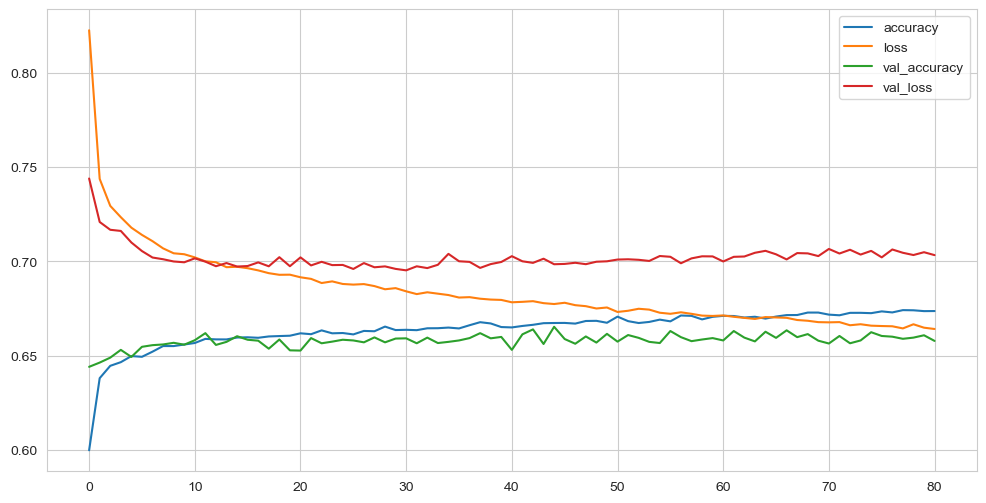

In [62]:
loss_df.plot()

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [117]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(model,X_train,y_train,X_test,y_test)

In [107]:
model = Sequential([
    
    Dense(128, activation="relu"),  
    (Dropout(0.2)),
    
    Dense(64, activation="relu"),  
    (Dropout(0.2)),
    Dense(64, activation="relu"),
  
   BatchNormalization(),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),  
    BatchNormalization(),
    Dense(8, activation="relu"), 
    
    Dense(4, activation="relu"),
    Dense(3, activation="softmax") 
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [108]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)


In [109]:
model.fit(x=X_train,
          y=y_train,
          validation_split = 0.1,
          batch_size=64,
          epochs=1000,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5517 - loss: 0.8882 - val_accuracy: 0.6403 - val_loss: 0.7423
Epoch 2/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6386 - loss: 0.7460 - val_accuracy: 0.6484 - val_loss: 0.7236
Epoch 3/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6468 - loss: 0.7285 - val_accuracy: 0.6501 - val_loss: 0.7118
Epoch 4/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6466 - loss: 0.7218 - val_accuracy: 0.6526 - val_loss: 0.7076
Epoch 5/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6488 - loss: 0.7162 - val_accuracy: 0.6554 - val_loss: 0.7060
Epoch 6/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6534 - loss: 0.7115 - val_accuracy: 0.6556 - val_loss: 0.7035
Epoch 7/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6543 - loss: 0.7103 - val_accuracy: 0.6575 - val_loss: 0.7040
Epoch 8/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6545

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6655 - loss: 0.6843 - val_accuracy: 0.6628 - val_loss: 0.6948
Epoch 51/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6620 - loss: 0.6895 - val_accuracy: 0.6603 - val_loss: 0.6963
Epoch 52/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6625 - loss: 0.6887 - val_accuracy: 0.6590 - val_loss: 0.6965
Epoch 53/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6668 - loss: 0.6863 - val_accuracy: 0.6576 - val_loss: 0.6964
Epoch 54/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6622 - loss: 0.6913 - val_accuracy: 0.6596 - val_loss: 0.6948
Epoch 55/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6616 - loss: 0.6874 - val_accuracy: 0.6594 - val_loss: 0.6967
Epoch 56/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6636 - loss: 0.6855 - val_accuracy: 0.6616 - val_loss: 0.6947
Epoch 57/1000
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6667 - loss

In [118]:
eval_metric(model,X_train,y_train,X_test,y_test)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[2201 1185  180]
 [1501 7457 1677]
 [ 464 1783 3552]]
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      3566
           1       0.72      0.70      0.71     10635
           2       0.66      0.61      0.63      5799

    accuracy                           0.66     20000
   macro avg       0.63      0.64      0.64     20000
weighted avg       0.66      0.66      0.66     20000


Train Set:
[[ 8962  4598   702]
 [ 5845 30155  6539]
 [ 1760  6837 14602]]
              precision    recall  f1-score   support

           0       0.54      0.63      0.58     14262
           1       0.73      0.71      0.72     42539
           2       0.67      0.63      0.65     23199

    accuracy                           0.67     80000
   macro avg       0.64      0.66      0.65     80000
weighted avg       0.68      0.67      0.67     80000



In [120]:
model = Sequential([
    
    Dense(128, activation="relu"),  
    (Dropout(0.2)),
    
    Dense(64, activation="relu"),
  (Dropout(0.2)),
   BatchNormalization(),
    
    Dense(64, activation="relu"),  
    (Dropout(0.2)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),  
    BatchNormalization(),
    Dense(8, activation="relu"), 
    
    Dense(4, activation="relu"),
    Dense(3, activation="softmax") 
])

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [121]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

In [122]:
model.fit(x=X_train,
          y=y_train,
          validation_split = 0.1,
          batch_size=64,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5369 - loss: 0.8945 - val_accuracy: 0.6434 - val_loss: 0.7323
Epoch 2/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6395 - loss: 0.7427 - val_accuracy: 0.6470 - val_loss: 0.7164
Epoch 3/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6440 - loss: 0.7287 - val_accuracy: 0.6480 - val_loss: 0.7127
Epoch 4/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6469 - loss: 0.7217 - val_accuracy: 0.6525 - val_loss: 0.7105
Epoch 5/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6528 - loss: 0.7127 - val_accuracy: 0.6534 - val_loss: 0.7110
Epoch 6/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6516 - loss: 0.7154 - val_accuracy: 0.6530 - val_loss: 0.7097
Epoch 7/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6497 - loss: 0.7131 - val_accuracy: 0.6513 - val_loss: 0.7040
Epoch 8/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6534 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6618 - loss: 0.6937 - val_accuracy: 0.6601 - val_loss: 0.6912
Epoch 51/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6599 - loss: 0.6928 - val_accuracy: 0.6621 - val_loss: 0.6942
Epoch 52/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6605 - loss: 0.6951 - val_accuracy: 0.6575 - val_loss: 0.6948
Epoch 53/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6591 - loss: 0.6962 - val_accuracy: 0.6582 - val_loss: 0.6967
Epoch 54/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6608 - loss: 0.6932 - val_accuracy: 0.6618 - val_loss: 0.6938
Epoch 55/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6602 - loss: 0.6929 - val_accuracy: 0.6579 - val_loss: 0.6929
Epoch 56/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6584 - loss: 0.6915 - val_accuracy: 0.6636 - val_loss: 0.6916
Epoch 57/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6618 - loss: 0.6953

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6641 - loss: 0.6890 - val_accuracy: 0.6587 - val_loss: 0.6932
Epoch 100/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6655 - loss: 0.6847 - val_accuracy: 0.6564 - val_loss: 0.6963
Epoch 101/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6663 - loss: 0.6832 - val_accuracy: 0.6649 - val_loss: 0.6923
Epoch 102/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6649 - loss: 0.6850 - val_accuracy: 0.6615 - val_loss: 0.6903
Epoch 103/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6659 - loss: 0.6849 - val_accuracy: 0.6645 - val_loss: 0.6910
Epoch 104/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6639 - loss: 0.6842 - val_accuracy: 0.6611 - val_loss: 0.6924
Epoch 105/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6640 - loss: 0.6862 - val_accuracy: 0.6616 - val_loss: 0.6956
Epoch 106/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6675 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6704 - loss: 0.6773 - val_accuracy: 0.6596 - val_loss: 0.6909
Epoch 149/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6685 - loss: 0.6802 - val_accuracy: 0.6625 - val_loss: 0.6927
Epoch 150/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6676 - loss: 0.6807 - val_accuracy: 0.6635 - val_loss: 0.6893
Epoch 151/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6713 - loss: 0.6762 - val_accuracy: 0.6611 - val_loss: 0.6883
Epoch 152/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6679 - loss: 0.6756 - val_accuracy: 0.6584 - val_loss: 0.6907
Epoch 153/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6704 - loss: 0.6769 - val_accuracy: 0.6653 - val_loss: 0.6879
Epoch 154/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6713 - loss: 0.6759 - val_accuracy: 0.6634 - val_loss: 0.6900
Epoch 155/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6728 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6757 - loss: 0.6685 - val_accuracy: 0.6689 - val_loss: 0.6822
Epoch 198/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6733 - loss: 0.6743 - val_accuracy: 0.6666 - val_loss: 0.6867
Epoch 199/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6715 - loss: 0.6714 - val_accuracy: 0.6675 - val_loss: 0.6845
Epoch 200/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6729 - loss: 0.6708 - val_accuracy: 0.6666 - val_loss: 0.6879
Epoch 201/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6765 - loss: 0.6692 - val_accuracy: 0.6683 - val_loss: 0.6811
Epoch 202/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6765 - loss: 0.6697 - val_accuracy: 0.6684 - val_loss: 0.6863
Epoch 203/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6780 - loss: 0.6626 - val_accuracy: 0.6684 - val_loss: 0.6804
Epoch 204/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6748 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6816 - loss: 0.6636 - val_accuracy: 0.6669 - val_loss: 0.6855
Epoch 247/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6730 - loss: 0.6699 - val_accuracy: 0.6720 - val_loss: 0.6808
Epoch 248/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6769 - loss: 0.6638 - val_accuracy: 0.6615 - val_loss: 0.6891
Epoch 249/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6724 - loss: 0.6665 - val_accuracy: 0.6706 - val_loss: 0.6858
Epoch 250/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6755 - loss: 0.6664 - val_accuracy: 0.6735 - val_loss: 0.6802
Epoch 251/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6718 - loss: 0.6728 - val_accuracy: 0.6690 - val_loss: 0.6833
Epoch 252/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6760 - loss: 0.6667 - val_accuracy: 0.6737 - val_loss: 0.6796
Epoch 253/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6773 - loss:

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6752 - loss: 0.6683 - val_accuracy: 0.6727 - val_loss: 0.6827
Epoch 296/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6746 - loss: 0.6668 - val_accuracy: 0.6719 - val_loss: 0.6848
Epoch 297/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6754 - loss: 0.6671 - val_accuracy: 0.6744 - val_loss: 0.6805
Epoch 298/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6768 - loss: 0.6631 - val_accuracy: 0.6718 - val_loss: 0.6784
Epoch 299/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6777 - loss: 0.6613 - val_accuracy: 0.6697 - val_loss: 0.6836
Epoch 300/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6795 - loss: 0.6615 - val_accuracy: 0.6725 - val_loss: 0.6814
Epoch 301/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6789 - loss: 0.6605 - val_accuracy: 0.6725 - val_loss: 0.6781
Epoch 302/500
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6782 - loss:

In [123]:
eval_metric(model,X_train,y_train,X_test,y_test)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Set:
[[1972 1402  192]
 [1190 7877 1568]
 [ 342 1856 3601]]
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      3566
           1       0.71      0.74      0.72     10635
           2       0.67      0.62      0.65      5799

    accuracy                           0.67     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.67      0.67      0.67     20000


Train Set:
[[ 8106  5435   721]
 [ 4528 32059  5952]
 [ 1270  7031 14898]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.58     14262
           1       0.72      0.75      0.74     42539
           2       0.69      0.64      0.67     23199

    accuracy                           0.69     80000
   macro avg       0.66      0.65      0.66     80000
weighted avg       0.69      0.69      0.69     80000



In [129]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

## Final Model and Model Deployment

### Prediction